<a href="https://colab.research.google.com/github/u1353279/DATA_PHD/blob/main/Northampton_Degdredation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# settings
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (9, 9)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Degredation Analysis for Northampton PV-01

In [3]:
northampton_1 = pd.read_csv('/content/drive/MyDrive/PHD/Data/Northampton1.csv')

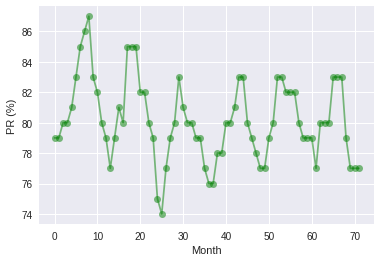

In [4]:
fig, axs = plt.subplots()
axs.plot(northampton_1.index, northampton_1.PR, 'o-', alpha = 0.5,color='g')
axs.set_ylabel('PR (%)');
axs.set_xlabel('Month')

resolution = 12
s=sm.tsa.seasonal_decompose(northampton_1.PR, model = 'multiplicative', freq = resolution)
#s.plot()

In [5]:
trend_df = pd.DataFrame(list(s.trend), columns = ['Trend'])
trend_df.insert(loc=0, column = 'Month', value=np.arange(len(trend_df)))
trend_df=trend_df[np.isfinite(trend_df['Trend'])]
y = trend_df.Trend
x = trend_df.Month
x, y = np.array(x), np.array(y)

x = sm.add_constant(x)

In [6]:
model = sm.OLS(y,x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     14.09
Date:                Fri, 29 Jan 2021   Prob (F-statistic):           0.000406
Time:                        19:05:00   Log-Likelihood:                -78.693
No. Observations:                  60   AIC:                             161.4
Df Residuals:                      58   BIC:                             165.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         81.0616      0.269    301.355      0.000      80.523      81.600
x1            -0.0256      0.007     -3.753      0.000      -0.039      -0.012
==============================================================================
Omnibus:                       21.597   Durbin-Watson:                   0.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.499
Skew:                          -0.392   Prob(JB):                       0.0639
Kurtosis:                       1.741   Cond. No.                         90.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Result interpretation

##### R-squared values is closer to zero showing that the model is not a good fit.

##### As the Prob (F-statistic) is less than 0.05 we can reject the null hypothesis ( the intercept only model is same as the co-effiecent model. if the null hypothesis was true the model would be useless. However this is not the case.

##### x1- p-value is equal to zero which can be interpreted as the feature co-efficient is not zero, tehrefore does have a relationship with the target.

In [7]:
#confidence level 95%
intercept, slope = results.params
CI_abs = resolution*results.conf_int(alpha = 0.05)[1]
CIL_abs = CI_abs[1]
CIH_abs = CI_abs[0]
round(CIL_abs,2),round(CIH_abs,2)

DR_abs = round(resolution*slope, 2)
DR_abs

-0.31

In [8]:
results.params

array([ 8.10615588e+01, -2.55603408e-02])

In [9]:
#confidence level 95%
CI_rel = 100*resolution*results.conf_int(alpha = 0.05)[1]/intercept
CIL_rel = CI_rel[1]
CIH_rel = CI_rel[0]
round(CIL_rel,2),round(CIH_rel,2)

DR_rel = round(100*resolution*slope/intercept,2)
DR_rel

-0.38

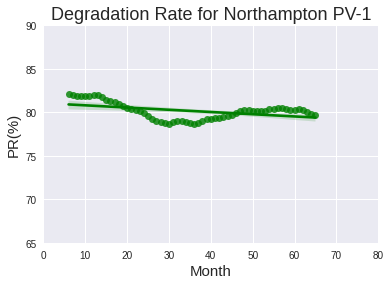

In [10]:
sns.regplot(y = trend_df['Trend'], x = trend_df['Month'], data = northampton_1, color='g')
plt.ylabel("PR(%)",fontsize=15)
plt.xlabel("Month", fontsize=15)
plt.ylim(65,90)
plt.xlim(0, 80)
plt.title("Degradation Rate for Northampton PV-1",fontsize=18)
plt.grid(True)
plt.show()

##### Yearly degredation for Northampton PV-1 range -0.31 & -0.38%

# Degredation Analysis for Northampton PV-02

In [11]:
northampton_2 = pd.read_csv('/content/drive/MyDrive/PHD/Data/Northampton2.csv')

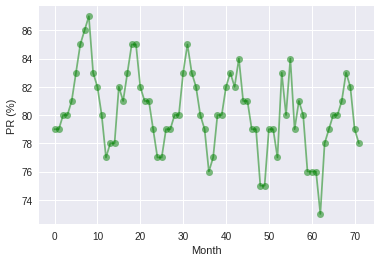

In [12]:
fig, axs = plt.subplots()
axs.plot(northampton_2.index, northampton_2.PR, 'o-', alpha = 0.5,color='g')
axs.set_ylabel('PR (%)');
axs.set_xlabel('Month')

resolution = 12
s=sm.tsa.seasonal_decompose(northampton_2.PR, model = 'multiplicative', freq = resolution)
#s.plot()

In [13]:
trend_df = pd.DataFrame(list(s.trend), columns = ['Trend'])
trend_df.insert(loc=0, column = 'Month', value=np.arange(len(trend_df)))
trend_df=trend_df[np.isfinite(trend_df['Trend'])]
y = trend_df.Trend
x = trend_df.Month
x, y = np.array(x), np.array(y)

x = sm.add_constant(x)

In [14]:
model = sm.OLS(y,x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     699.7
Date:                Fri, 29 Jan 2021   Prob (F-statistic):           4.67e-34
Time:                        19:07:42   Log-Likelihood:                -10.126
No. Observations:                  60   AIC:                             24.25
Df Residuals:                      58   BIC:                             28.44
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         82.2340      0.086    958.570      0.000      82.062      82.406
x1            -0.0575      0.002    -26.452      0.000      -0.062      -0.053
==============================================================================
Omnibus:                        3.100   Durbin-Watson:                   0.138
Prob(Omnibus):                  0.212   Jarque-Bera (JB):                2.723
Skew:                           0.425   Prob(JB):                        0.256
Kurtosis:                       2.393   Cond. No.                         90.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Result interpretation

##### R-squared values is closer to one showing that the model has a good fit.

##### As the Prob (F-statistic) is less than 0.05 we can reject the null hypothesis ( the intercept only model is same as the co-effiecent model. if the null hypothesis was true the model would be useless. However this is not the case.

##### x1- p-value is equal to zero which can be interpreted as the feature co-efficient is not zero, thErefore does have a relationship with the target.

In [15]:
#confidence level 95%
intercept, slope = results.params
CI_abs = resolution*results.conf_int(alpha = 0.05)[1]
CIL_abs = CI_abs[1]
CIH_abs = CI_abs[0]
round(CIL_abs,2),round(CIH_abs,2)

DR_abs = round(resolution*slope, 2)
DR_abs

-0.69

In [16]:
results.params

array([ 8.22339601e+01, -5.74511438e-02])

In [17]:
#confidence level 95%
CI_rel = 100*resolution*results.conf_int(alpha = 0.05)[1]/intercept
CIL_rel = CI_rel[1]
CIH_rel = CI_rel[0]
round(CIL_rel,2),round(CIH_rel,2)

DR_rel = round(100*resolution*slope/intercept,2)
DR_rel

-0.84

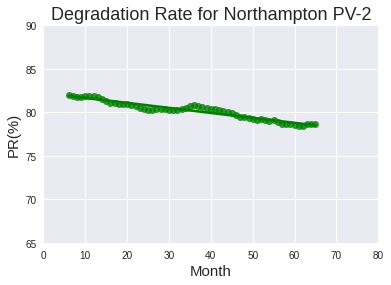

In [18]:
sns.regplot(y = trend_df['Trend'], x = trend_df['Month'], data = northampton_2, color='g')
plt.ylabel("PR(%)",fontsize=15)
plt.xlabel("Month", fontsize=15)
plt.ylim(65,90)
plt.xlim(0, 80)
plt.title("Degradation Rate for Northampton PV-2",fontsize=18)
plt.grid(True)
plt.show()

##### Yearly degredation for Northampton PV-2 range -0.69 & -0.84%

# Degredation Analysis for Northampton PV-03

In [19]:
northampton_3 = pd.read_csv('/content/drive/MyDrive/PHD/Data/Northampton3.csv')

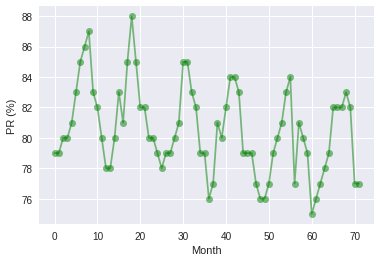

In [21]:
fig, axs = plt.subplots()
axs.plot(northampton_3.index, northampton_3.PR, 'o-', alpha = 0.5,color='g')
axs.set_ylabel('PR (%)');
axs.set_xlabel('Month')

resolution = 12
s=sm.tsa.seasonal_decompose(northampton_3.PR, model = 'multiplicative', freq = resolution)
#s.plot()

In [22]:
trend_df = pd.DataFrame(list(s.trend), columns = ['Trend'])
trend_df.insert(loc=0, column = 'Month', value=np.arange(len(trend_df)))
trend_df=trend_df[np.isfinite(trend_df['Trend'])]
y = trend_df.Trend
x = trend_df.Month
x, y = np.array(x), np.array(y)

x = sm.add_constant(x)

In [23]:
model = sm.OLS(y,x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     615.2
Date:                Fri, 29 Jan 2021   Prob (F-statistic):           1.45e-32
Time:                        19:10:02   Log-Likelihood:                -18.244
No. Observations:                  60   AIC:                             40.49
Df Residuals:                      58   BIC:                             44.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         82.7388      0.098    842.398      0.000      82.542      82.935
x1            -0.0617      0.002    -24.803      0.000      -0.067      -0.057
==============================================================================
Omnibus:                        1.535   Durbin-Watson:                   0.171
Prob(Omnibus):                  0.464   Jarque-Bera (JB):                1.196
Skew:                           0.112   Prob(JB):                        0.550
Kurtosis:                       2.346   Cond. No.                         90.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Result interpretation

##### R-squared values is closer to one showing that the model has a good fit.

##### As the Prob (F-statistic) is less than 0.05 we can reject the null hypothesis ( the intercept only model is same as the co-effiecent model. if the null hypothesis was true the model would be useless. However this is not the case.

##### x1- p-value is equal to zero which can be interpreted as the feature co-efficient is not zero, thErefore does have a relationship with the target.

In [24]:
#confidence level 95%
intercept, slope = results.params
CI_abs = resolution*results.conf_int(alpha = 0.05)[1]
CIL_abs = CI_abs[1]
CIH_abs = CI_abs[0]
round(CIL_abs,2),round(CIH_abs,2)

DR_abs = round(resolution*slope, 2)
DR_abs

-0.74

In [25]:
results.params

array([ 8.27387928e+01, -6.16756970e-02])

In [26]:
#confidence level 95%
CI_rel = 100*resolution*results.conf_int(alpha = 0.05)[1]/intercept
CIL_rel = CI_rel[1]
CIH_rel = CI_rel[0]
round(CIL_rel,2),round(CIH_rel,2)

DR_rel = round(100*resolution*slope/intercept,2)
DR_rel

-0.89

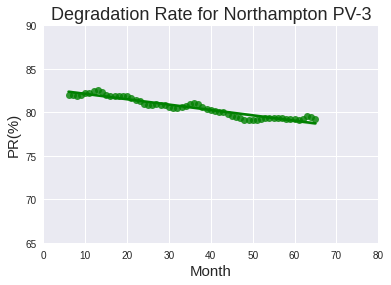

In [27]:
sns.regplot(y = trend_df['Trend'], x = trend_df['Month'], data = northampton_3, color='g')
plt.ylabel("PR(%)",fontsize=15)
plt.xlabel("Month", fontsize=15)
plt.ylim(65,90)
plt.xlim(0, 80)
plt.title("Degradation Rate for Northampton PV-3",fontsize=18)
plt.grid(True)
plt.show()

##### Yearly degredation for Northampton PV-3 range -0.74 & -0.89%